# Big-Data Analytics
## Project: Student Alcohol Consumption

### Project Group 19



In [1]:
# Data Wrangling
import pandas as pd
import numpy as np

# Data Viz
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.feature_selection import RFE

# Ml model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

np.warnings.filterwarnings('ignore')

## Data Collection

The data comes from two datasets provided on kaggle: 
#### Data Link : http://kaggle.com/uciml/student-alcohol-consumption
Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

- school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
- sex - student's sex (binary: 'F' - female or 'M' - male)
- age - student's age (numeric: from 15 to 22) address - student's home address type (binary: 'U' - urban or 'R' - rural)
- famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
- guardian - student's guardian (nominal: 'mother', 'father' or 'other')
- traveltime - home to school travel time (numeric: 1 - 1 hour)
- studytime - weekly study time (numeric: 1 - 10 hours)
- failures - number of past class failures (numeric: n if 1<=n<3, else 4)
- schoolsup - extra educational support (binary: yes or no)
- famsup - family educational support (binary: yes or no)
- paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- activities - extra-curricular activities (binary: yes or no)
- nursery - attended nursery school (binary: yes or no)
- higher - wants to take higher education (binary: yes or no)
- internet - Internet access at home (binary: yes or no)
- romantic - with a romantic relationship (binary: yes or no)
- famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- freetime - free time after school (numeric: from 1 - very low to 5 - very high)
- goout - going out with friends (numeric: from 1 - very low to 5 - very high)
- Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- health - current health status (numeric: from 1 - very bad to 5 - very good)
- absences - number of school absences (numeric: from 0 to 93)
- These grades are related with the course subject, Math or Portuguese:

- G1 - first period grade (numeric: from 0 to 20)
- G2 - second period grade (numeric: from 0 to 20)
- G3 - final grade (numeric: from 0 to 20, output target)

Additional note: there are several (382) students that belong to both datasets. These students can be identified by searching for identical attributes that characterize each student ['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','nursery','internet'].


In [2]:
# read student_mat.csv from drive and show head
d_mat = pd.read_csv("https://drive.switch.ch/index.php/s/F7lAt9xxS5umoKG/download")
d_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
# read student_por.csv from drive and show head 
d_por = pd.read_csv("https://drive.switch.ch/index.php/s/qUmkAEJqWK5OAFP/download")
d_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [4]:
# get info about datasets
d_mat.info()
d_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

## Outliers

The overview of the dataset shows clearly: the dataset is already quite clean. There are no missing values for any variable.

## Data Preprocessing

As mentioned, there are some duplicated entries if we combine both student datasets. To get ride of the duplicated students, we concatenate the two datasets and drop duplicated rows using the pandas library. Besides that, the dataset is sufficently clean.

In [5]:
# concat the datasets to data and export as "student.csv"
data = pd.concat([d_mat,d_por],axis=0)
data.drop_duplicates(inplace=True)

data.to_csv("student.csv")
data.shape

(1044, 33)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher   

## Data Exploration

This part will look at data relationship based on Portuguese language course and math course. Firstly, let's explore common factors from both dataset. They are: school; address; family size; parent status; mother job; father job; reason; attending nursery school; internet; age; mother education level and father education level. 

Below, the graph tells this group of students has an age range of 15-20; more students comes from Gabriel Pereira than Mousinho da Silveira and they are attending school for course reason. More students live in urban areas than rural ones; the majority's parents are still together. For most students, family size is greather than 3 and for more students it's the mother who has a higher education level, not the father. 

Secondly, we check upon correlations of two courses students. 

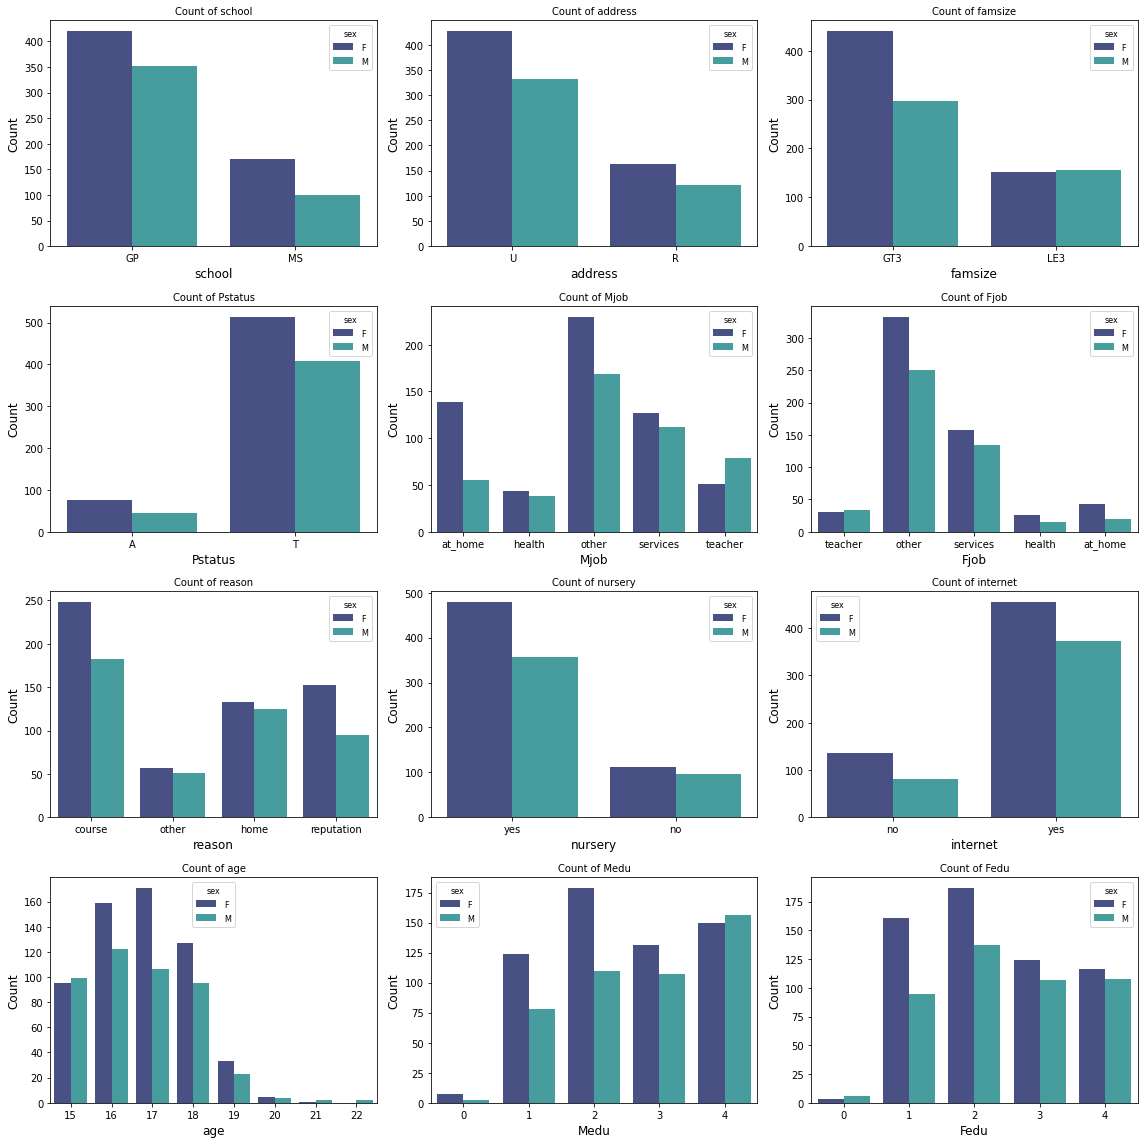

In [7]:
#counting plot of common factors for both dataset
fig=plt.figure()

cols=['school','address','famsize','Pstatus', 'Mjob','Fjob','reason','nursery','internet','age','Medu','Fedu']


for i,col in enumerate(cols):
    fig.add_subplot(4,3,i+1)
    fig.set_size_inches(16,16)
    ax = sns.countplot(x=col,data=data,palette="mako",hue='sex')
    plt.title(f'Count of {col}',fontsize=10)
    plt.xlabel(col,fontsize=12)
    plt.ylabel('Count',fontsize=12)
    plt.setp(ax.get_legend().get_texts(), fontsize='8')  
    plt.setp(ax.get_legend().get_title(), fontsize='8') 
    plt.tight_layout()

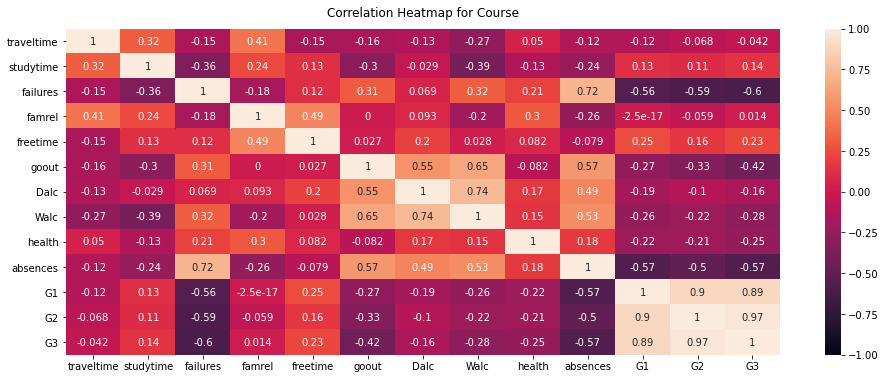

In [8]:
#checking correlation for value from Port data
corr=data.iloc[10:33,10:33].corr()
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap for Course', fontdict={'fontsize':12}, pad=12);

These two boxplot show the trend that students buy more alcohol on weekends than weekdays. If the family relations are getting better, students buy less alcohol. However, if students have a worse family relationship, there is no difference in the alcohol amount from weekdays or weenkend. The number of past courses failures correlates similarly with alcohol consumption, more alcohol on weekends indicates more failures. 

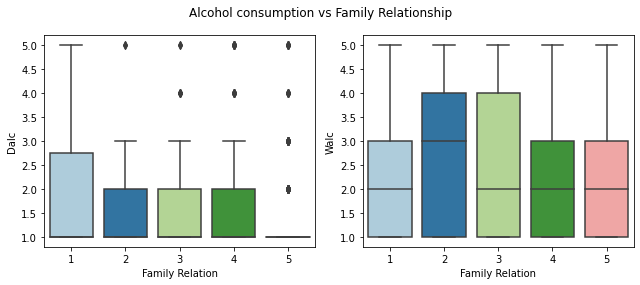

In [9]:
# Family relationship vs alcohol consumption
cols=['Dalc','Walc']
fig=plt.figure()

for i,col in enumerate(cols):
    fig.add_subplot(1,2,i+1)
    fig.set_size_inches(9,4)
    sns.boxplot(x='famrel',y=col,data=data,palette="Paired").set(xlabel='Family Relation')
    plt.tight_layout()
    plt.suptitle('Alcohol consumption vs Family Relationship')

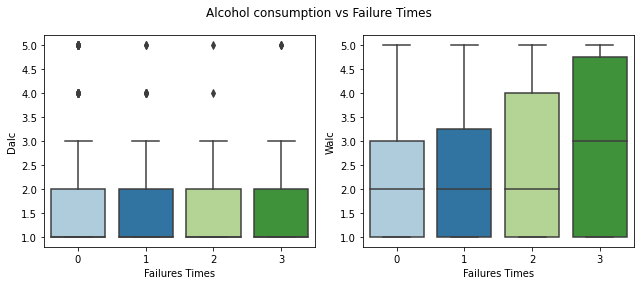

In [10]:
# Failure courses vs alcohol consumption
cols=['Dalc','Walc']
fig=plt.figure()

for i,col in enumerate(cols):
    fig.add_subplot(1,2,i+1)
    fig.set_size_inches(9,4)
    sns.boxplot(x='failures',y=col,data=data,palette="Paired").set(xlabel='Failures Times')
    plt.tight_layout()
    plt.suptitle('Alcohol consumption vs Failure Times ')

These two Line charts illustrate the Alcohol consumption Vs students' time distributions by age groups on workdays and weekends. For traveltime we see no clear tendency. However, for studytime, we can observe that drinking more is correlated with studying less. Freetime vs alcohol consumption seems to indicate that some age groups tend to drink more the more free time they have... which is not that surprising.\
If we compare to the alcohol consumption on the weekend, we get more or less the same observations.

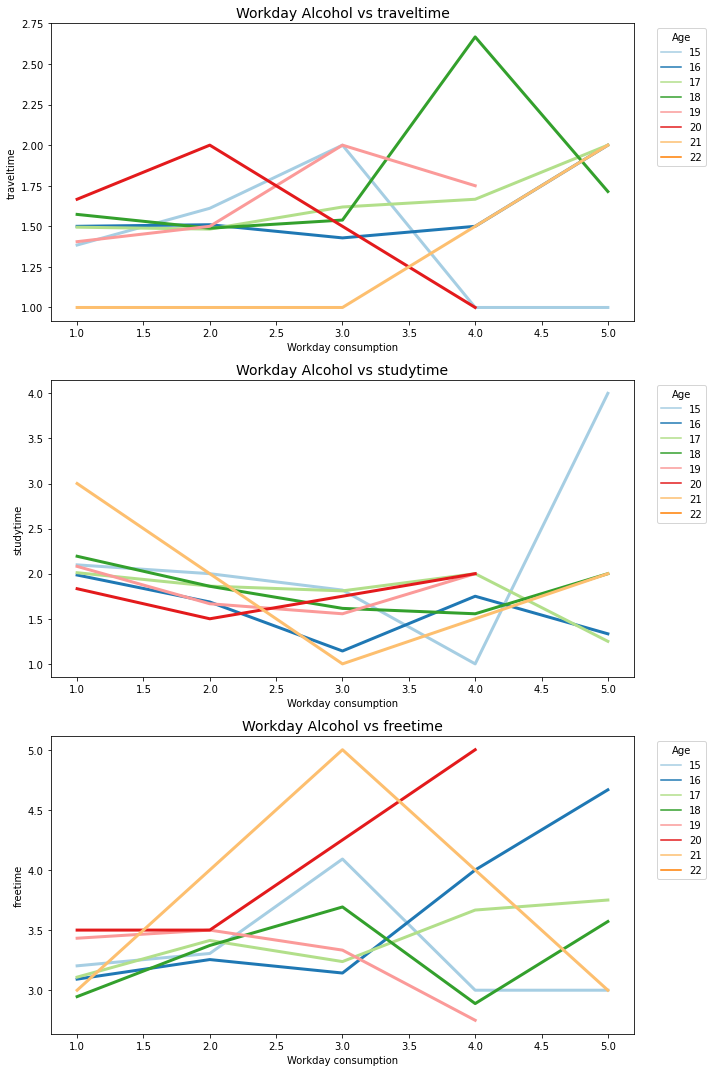

In [11]:
#Workday alcohol Vs Time Distributed
TimeDis=['traveltime', 'studytime','freetime']
fig=plt.figure()

for i,col in enumerate(TimeDis):
    fig.add_subplot(3,1,i+1)
    fig.set_size_inches(10,15)
    
    health=data.groupby(['Dalc','age'])[col].mean()
    health=health.reset_index('Dalc')
 
    ax = sns.lineplot(x='Dalc',y=col,hue=health.index,
                 data=health,palette="Paired",linewidth=3)
    plt.tight_layout()
    plt.title(f'Workday Alcohol vs {col}',fontsize=14)
    plt.xlabel("Workday consumption",fontsize = 10)
    plt.ylabel(f'{col}',fontsize = 10)
    plt.legend(fontsize = 10,bbox_to_anchor= (1.03, 1),title="Age")
    

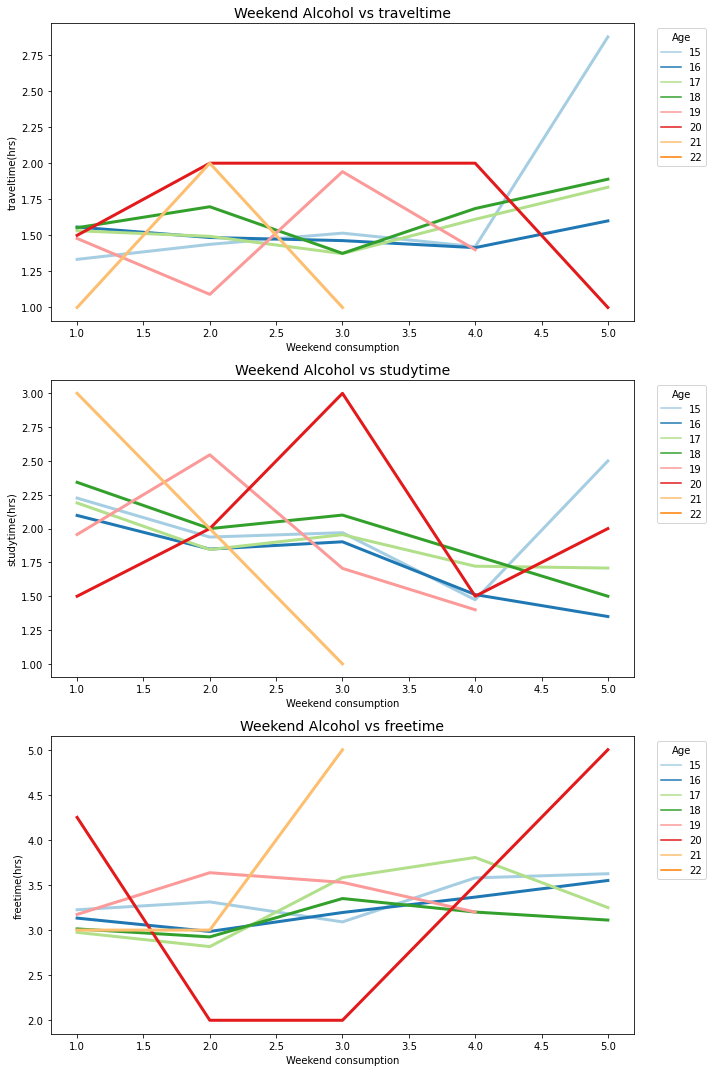

In [12]:
#Weekend Alco Vs Time Distubuted by Age
TimeDis=['traveltime', 'studytime','freetime']
fig=plt.figure()

for i,col in enumerate(TimeDis):
    fig.add_subplot(3,1,i+1)
    fig.set_size_inches(10,15)
    
    X=data.groupby(['Walc','age'])[col].mean()
    X=X.reset_index('Walc')
 
    ax = sns.lineplot(x='Walc',y=col,hue=X.index,
                 data=X,palette="Paired",linewidth=3)
    plt.tight_layout()
    plt.title(f'Weekend Alcohol vs {col}',fontsize=14)
    plt.xlabel("Weekend consumption",fontsize = 10)
    plt.ylabel(f'{col}(hrs)',fontsize = 10)
    plt.legend(fontsize = 10, bbox_to_anchor= (1.03, 1),title="Age")
    

Next, we compare alcohol consumption during the weekend with grades from 3 different periods (i.e. years) of studying (G1, G2, G3), furthermore we divide the students based on engagement in extra-curricular activities. It shows students who buy more alcohol have lower grade performance than those who buy less alcohol. Students who engage in activities have higher grades than other students. As periods increase, the gap of grades between activities and non-activities students is getting smaller for alcohol consumption below 4.

An intriguing obeservation is that students that engage in activities start getting better grades beginnging from a certain level of alcohol consumption (4), if they consume more alcohol.
This observation also holds if we compare to the alcohol consumption during the week.
However, it's clear that alcohol consumption during the week affects the grade more than on the weekend. Besides that, we observe the opposit as for alcohol consumption on the weekend: the gape of grades between activities and non-activity students is getting bigger as periods increase.

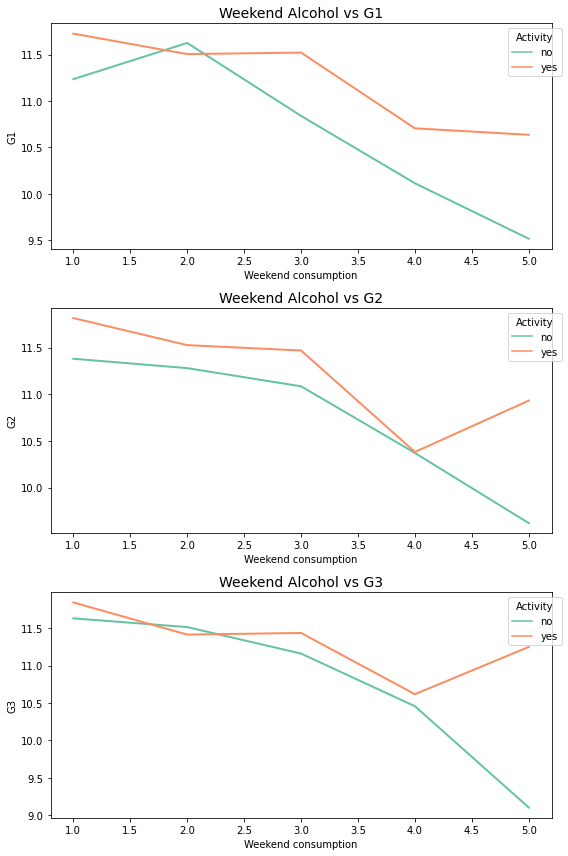

In [13]:
#weekend Alco Vs 2 phases grades by Activities
Grade=['G1','G2','G3']
fig=plt.figure()
for i,col in enumerate(Grade):
    fig.add_subplot(3,1,i+1)
    fig.set_size_inches(8,12)
    
    x=data.groupby(['Walc','activities'])[col].mean()
    x=x.reset_index('Walc')
    
    sns.lineplot(x='Walc',y=col,hue=x.index,data=x, palette="Set2",linewidth=2)
    plt.tight_layout()
    plt.title(f'Weekend Alcohol vs {col}',fontsize=14)
    plt.xlabel("Weekend consumption",fontsize = 10)
    plt.ylabel(f'{col}',fontsize = 10)
    plt.legend(fontsize = 10,bbox_to_anchor= (1.03, 1),title="Activity")

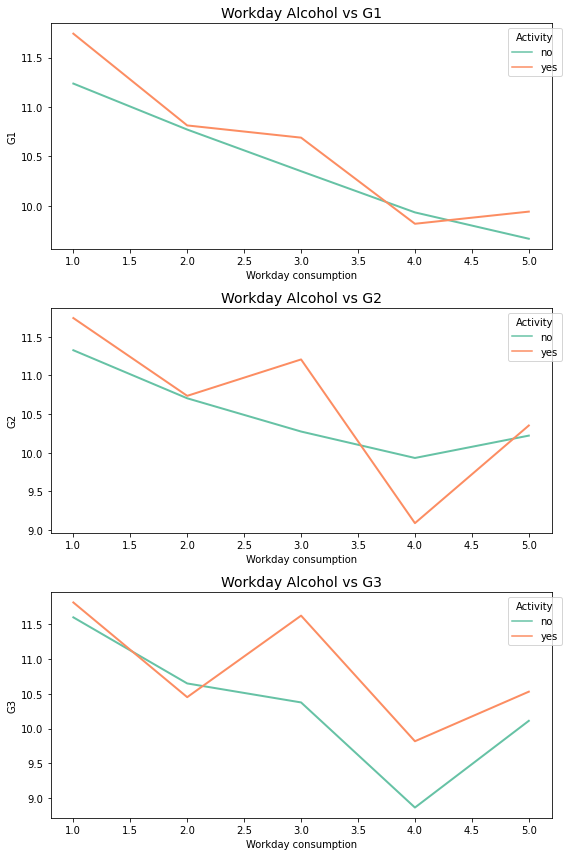

In [14]:
#Workday Alco Vs 3 phases grade by Avtivities
Grade=['G1','G2','G3']
fig=plt.figure()
for i,col in enumerate(Grade):
    fig.add_subplot(3,1,i+1)
    fig.set_size_inches(8,12)
    
    x=data.groupby(['Dalc','activities'])[col].mean()
    x=x.reset_index('Dalc')
    
    sns.lineplot(x='Dalc',y=col,hue=x.index,data=x,palette="Set2",linewidth=2)
    plt.tight_layout()
    plt.title(f'Workday Alcohol vs {col}',fontsize=14)
    plt.xlabel("Workday consumption",fontsize = 10)
    plt.ylabel(f'{col}',fontsize = 10)
    plt.legend(fontsize = 10,bbox_to_anchor= (1.03, 1),title="Activity")

The line charts show that students that have family support, if they consume too much alcohol, also get worse grades. Furtheremore, we observe that alcohol consumption on workdays affects students with family support more, starting at a consompution of ~3. Again we see that 'alcoholics' consuming more than 4 are getting better grades again.

For the weekend, there is less difference between no family support and family support. The more a student drinks, the worse the grades.

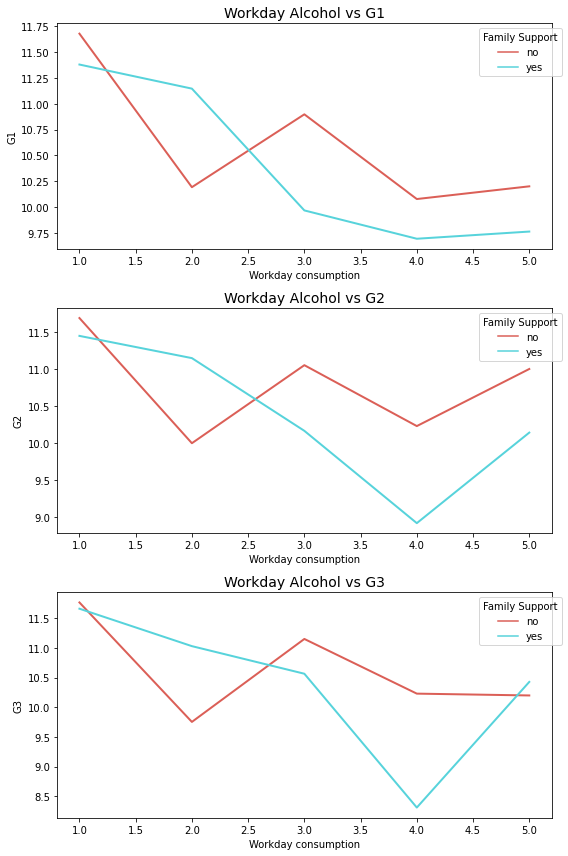

In [15]:
#Workday Alco Vs 3 phases by Family support
Grade=['G1','G2','G3']
fig=plt.figure()
for i,col in enumerate(Grade):
    fig.add_subplot(3,1,i+1)
    fig.set_size_inches(8,12)
    
    x=data.groupby(['Dalc','famsup'])[col].mean()
    x=x.reset_index('Dalc')
    
    sns.lineplot(x='Dalc',y=col,hue=x.index,data=x, palette="hls",linewidth=2)
    plt.tight_layout()
    plt.title(f'Workday Alcohol vs {col}',fontsize=14)
    plt.xlabel("Workday consumption",fontsize = 10)
    plt.ylabel(f'{col}',fontsize = 10)
    plt.legend(fontsize =10,bbox_to_anchor= (1.03, 1),title="Family Support")

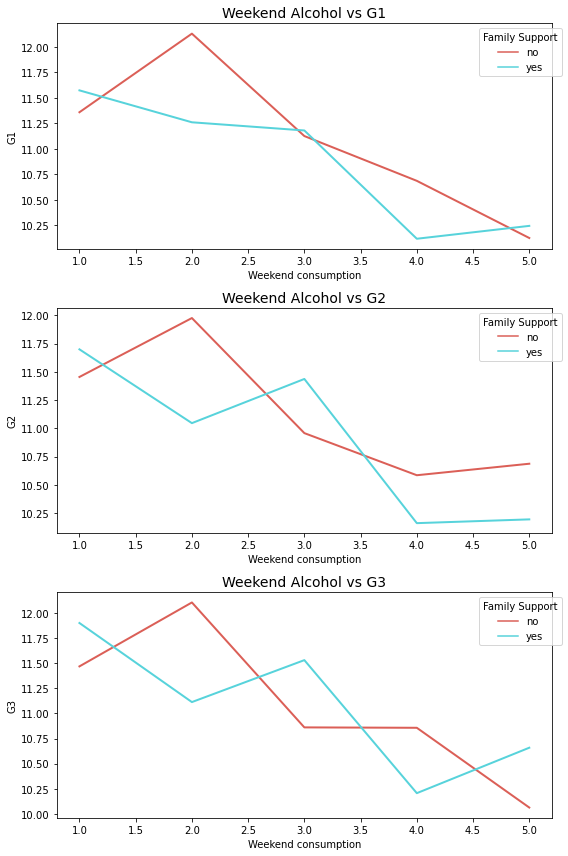

In [16]:
#Weekend Alco Vs 3 phases grades by Family support
Grade=['G1','G2','G3']
fig=plt.figure()
for i,col in enumerate(Grade):
    fig.add_subplot(3,1,i+1)
    fig.set_size_inches(8,12)
    
    x=data.groupby(['Walc','famsup'])[col].mean()
    x=x.reset_index('Walc')
    
    sns.lineplot(x='Walc',y=col,hue=x.index,data=x,palette="hls",linewidth=2)
    plt.tight_layout()
    plt.title(f'Weekend Alcohol vs {col}',fontsize=14)
    plt.xlabel("Weekend consumption",fontsize = 10)
    plt.ylabel(f'{col}',fontsize = 10)
    plt.legend(fontsize = 10,bbox_to_anchor= (1.03, 1),title="Family Support")

## Outliers

The summary statistics serves as a base to check for possible outliers. For that purpose, we take a look at the maximum value, the 75% and the 90% quantile. The column "absences" could contain outliers as the 90% quantile value is at 12.0, but the maximum is 75.0. We decided not to rescale the column as we would expect the variable absences to have some outliers, i.e. students that skipped a lot of classes.

In [17]:
stats = data.describe()
stats.append(data.quantile(0.9))

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000
0.9,18.000000,4.000000,4.000000,2.000000,3.000000,1.000000,5.000000,5.000000,5.000000,3.000000,4.000000,5.000000,12.000000,15.000000,15.000000,16.000000


## Model/Algorithm Design

### Predicting Final Grade

Random Forest Regressor

Feature Selection

In [18]:
data = pd.get_dummies(data)


In [19]:
X = data.drop('G3', axis=1).values
y = data.loc[:,'G3'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Building the model based feature selection
n_features = [5, 10, 15, 20, 25, 30, 35, 40]
for i in n_features:
    select = RFE(RandomForestRegressor(n_estimators=100, random_state=42), n_features_to_select=i)

    select.fit(X_train, y_train)

    X_train_rfe = select.transform(X_train)
    X_test_rfe = select.transform(X_test)

    score_train = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train_rfe, y_train).score(X_train_rfe, y_train)
    score_test = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train_rfe, y_train).score(X_test_rfe, y_test)

    print("Train score: {:.3f}".format(score_train) ,"Test score: {:.3f}".format(score_test), " number of features: {}".format(i))

Train score: 0.972 Test score: 0.763  number of features: 5
Train score: 0.981 Test score: 0.791  number of features: 10
Train score: 0.980 Test score: 0.816  number of features: 15
Train score: 0.980 Test score: 0.818  number of features: 20
Train score: 0.979 Test score: 0.813  number of features: 25
Train score: 0.979 Test score: 0.815  number of features: 30
Train score: 0.980 Test score: 0.815  number of features: 35
Train score: 0.979 Test score: 0.817  number of features: 40


Display Selected Features. We observed that the test score starts fluctuating around 0.81 starting with 15 features. Thus, we display next these 15 features.

In [20]:
select = RFE(RandomForestRegressor(n_estimators=100, random_state=42), n_features_to_select=15)


select.fit(X_train, y_train)

mask = select.get_support()

features = pd.DataFrame({'features':list(data.drop('G3', axis=1).keys()), 'select':list(mask)})
features = list(features[features['select']==True]['features'])
display(features)

['age',
 'traveltime',
 'studytime',
 'famrel',
 'freetime',
 'goout',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'Mjob_teacher',
 'Fjob_services',
 'reason_home',
 'guardian_father']

In [21]:
X = data[features]
y = data['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
score_test_rf = model_rf.score(X_test, y_test)
score_test_rf


0.8157232840788265

In [22]:
print(model_rf.feature_importances_)

[0.01134322 0.00571344 0.01190928 0.00632988 0.00780868 0.01396474
 0.00682221 0.00886193 0.05892469 0.01538597 0.82722446 0.00518579
 0.00782762 0.00609202 0.00660607]


In [23]:
importance = pd.DataFrame({'Features' : features, 'Importance': list(model_rf.feature_importances_)})
importance.sort_values(by=['Importance'],ascending=False)

,Features,Importance
10,G2,0.827224
8,absences,0.058925
9,G1,0.015386
5,goout,0.013965
2,studytime,0.011909
0,age,0.011343
7,health,0.008862
12,Fjob_services,0.007828
4,freetime,0.007809
6,Walc,0.006822


The results show that the most important features is by fare G2, the grades from the second period, followed by absences. After that, the importance (R<sup>2</sup> value) decreases rapidly.

<AxesSubplot:title={'center':'Feature and Importance'}, xlabel='Features'>

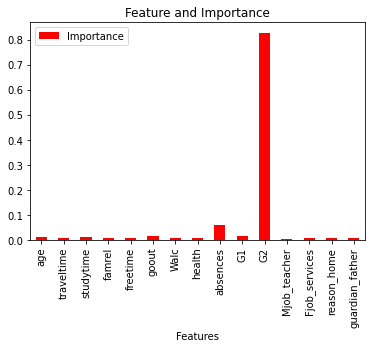

In [24]:
importance.plot(kind='bar', x='Features', y='Importance', color='red',title="Feature and Importance")

Decision Tree Regressor

In [25]:
from sklearn.tree import DecisionTreeRegressor

In [26]:
X = data.drop('G3', axis=1).values
y = data.loc[:,'G3'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Building the model based feature selection
n_features = [5, 10, 15, 20, 25, 30, 35, 40]
for i in n_features:
    select = RFE(DecisionTreeRegressor(max_depth=15), n_features_to_select=i)

    select.fit(X_train, y_train)

    X_train_rfe = select.transform(X_train)
    X_test_rfe = select.transform(X_test)

    score_train = DecisionTreeRegressor(max_depth=15).fit(X_train_rfe, y_train).score(X_train_rfe, y_train)
    score_test =DecisionTreeRegressor(max_depth=15).fit(X_train_rfe, y_train).score(X_test_rfe, y_test)

    print("Train score: {:.3f}".format(score_train) ,"Test score: {:.3f}".format(score_test), " number of features: {}".format(i))

Train score: 0.989 Test score: 0.682  number of features: 5
Train score: 0.999 Test score: 0.649  number of features: 10
Train score: 1.000 Test score: 0.710  number of features: 15
Train score: 1.000 Test score: 0.727  number of features: 20
Train score: 1.000 Test score: 0.720  number of features: 25
Train score: 1.000 Test score: 0.728  number of features: 30
Train score: 1.000 Test score: 0.722  number of features: 35
Train score: 1.000 Test score: 0.727  number of features: 40


In [27]:
select = RFE(DecisionTreeRegressor(max_depth=15), n_features_to_select=15)


select.fit(X_train, y_train)

mask = select.get_support()

features = pd.DataFrame({'features':list(data.drop('G3', axis=1).keys()), 'select':list(mask)})
features = list(features[features['select']==True]['features'])
display(features)

['age',
 'Medu',
 'traveltime',
 'studytime',
 'famrel',
 'goout',
 'Walc',
 'absences',
 'G1',
 'G2',
 'sex_F',
 'Fjob_services',
 'reason_home',
 'guardian_father',
 'higher_yes']

In [28]:
X = data[features]
y = data['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model_dt = DecisionTreeRegressor(max_depth=15)
model_dt.fit(X_train, y_train)
score_test_dt = model_dt.score(X_test, y_test)
score_test_dt


0.7066178229665072

In [29]:
print(model_dt.feature_importances_)

[0.01092084 0.00397817 0.00357997 0.01825111 0.00378289 0.00442313
 0.00912531 0.05842748 0.0097582  0.82510994 0.01076693 0.01845812
 0.00417706 0.00906455 0.0101763 ]


In [30]:
importance = pd.DataFrame({'Features' : features, 'Importance': list(model_dt.feature_importances_)})
importance.sort_values(by=['Importance'],ascending=False)

,Features,Importance
9,G2,0.825110
7,absences,0.058427
11,Fjob_services,0.018458
3,studytime,0.018251
0,age,0.010921
10,sex_F,0.010767
14,higher_yes,0.010176
8,G1,0.009758
6,Walc,0.009125
13,guardian_father,0.009065


<AxesSubplot:title={'center':'Feature and Importance'}, xlabel='Features'>

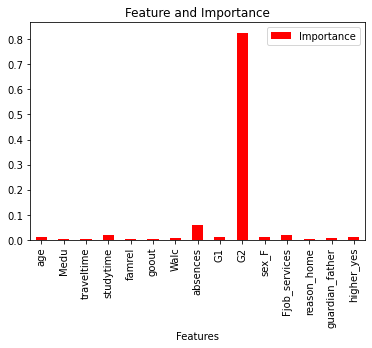

In [31]:
importance.plot(kind='bar', x='Features', y='Importance', color='red',title="Feature and Importance")

Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
X = data.drop('G3', axis=1).values
y = data.loc[:,'G3'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Building the model based feature selection
n_features = [5, 10, 15, 20, 25, 30, 35, 40]
for i in n_features:
    select = RFE(LinearRegression(), n_features_to_select=i)

    select.fit(X_train, y_train)

    X_train_rfe = select.transform(X_train)
    X_test_rfe = select.transform(X_test)

    score_train = LinearRegression().fit(X_train_rfe, y_train).score(X_train_rfe, y_train)
    score_test = LinearRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)

    print("Train score: {:.3f}".format(score_train) ,"Test score: {:.3f}".format(score_test), " number of features: {}".format(i))

Train score: 0.030 Test score: 0.032  number of features: 5
Train score: 0.026 Test score: 0.028  number of features: 10
Train score: 0.039 Test score: 0.050  number of features: 15
Train score: 0.046 Test score: 0.062  number of features: 20
Train score: 0.051 Test score: 0.064  number of features: 25
Train score: 0.059 Test score: 0.075  number of features: 30
Train score: 0.074 Test score: 0.086  number of features: 35
Train score: 0.118 Test score: 0.056  number of features: 40


In [34]:
select = RFE(LinearRegression(), n_features_to_select=15)


select.fit(X_train, y_train)

mask = select.get_support()

features = pd.DataFrame({'features':list(data.drop('G3', axis=1).keys()), 'select':list(mask)})
features = list(features[features['select']==True]['features'])
display(features)

['school_GP',
 'school_MS',
 'Pstatus_A',
 'Pstatus_T',
 'schoolsup_no',
 'schoolsup_yes',
 'paid_no',
 'activities_no',
 'activities_yes',
 'nursery_no',
 'nursery_yes',
 'internet_no',
 'internet_yes',
 'romantic_no',
 'romantic_yes']

In [35]:
X = data[features]
y = data['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
score_test_lr = model_lr.score(X_test, y_test)
score_test_lr


0.05022615131578956

Comparing Models

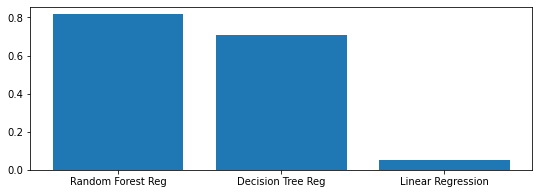

In [36]:
labels = ["Random Forest Reg" , "Decision Tree Reg","Linear Regression"]
values = [score_test_rf,score_test_dt,score_test_lr]
plt.figure(figsize=(9, 3))
plt.bar(labels, values)
plt.show()

We tried to predict final grade of student. Thanks to EDA part, we already had information about the structure of the data. This knowledge helps us a lot when deciding model candidates. 

We used regression models since our target data , final grade of students (G3) is a continous data. We utilized from feature selection algorithms in order to reduce the number of features during modeling. We used RFE algorithm (Recursive Feature Elimination) as feature selection algorithm. We thought that selecting features by a recursive approach best suits to our data because of the way of the algorithm works : considering smaller and smaller sets of features in each iteration. 

We also decided on total number of features by trying different feature numbers and comparing their scores.

We compared 3 different algorithms : Random Forest Regression , Decision Tree Regression, Linear Regression. We decided to use Random Forest Regression as our final model because of it's score. Also we decided to use 15 features . These features are : ['age','traveltime','studytime','famrel','freetime','goout','Walc','health','absences','G1','G2',Mjob_teacher','Fjob_services','reason_home','guardian_father'] 

Our model has 0.82 R<sup>2</sup> Score out of 1.0 which is acceptable for us . So we are able to predict final grade of user based on several features. And maybe one of the most interesting finding in our model is Weekend alcohol consumption has more effect on the final grade than weekday alcohol consumption. And also second exam has most effect on the final grade. 